# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Over the past decade, the NICS has been utilized extensively, with more than 100 million background check processes conducted by cashiers. Through this rigorous screening process, over 700,000 individuals have been rejected due to various disqualifying factors. Such data provides valuable insights into the landscape of firearms ownership and regulation in the United States.

>In this analysis, we will explore and answer key questions using the available dataset. The three primary questions we aim to address are as follows:

   >>Which state has the highest number of handguns, long guns, and other types of firearms?

   >>What is the overall level of firearm ownership permitted across different states?

   >>Which state exhibits a high number of guns per person?

>To gain a comprehensive understanding of these aspects, we have employed various chart types and visualization techniques to present the data effectively. By examining the dataset and visualizations, we can draw meaningful conclusions about firearm ownership and its distribution across different states.

>Let's delve into the analysis and explore the answers to these questions using the provided dataset.

In [1]:
# setting up import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Before loading data, we have to
# convert XLSX to CSV

# Read the XLSX file
xlsx_file = pd.read_excel('gun_data.xlsx')

# CONVERT
csv_file = 'gun_data.csv'
xlsx_file.to_csv(csv_file, index=False, encoding='utf-8')

In [3]:
# Now let's load our data

df_gun = pd.read_csv('gun_data.csv')
df_census = pd.read_csv('U.S. Census Data.csv')


In [4]:
# Let's print gun_data
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
# Let's print U.S. Census Data
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [6]:
# Number of Samples & Columns of both dataFrames
df_gun.shape, df_census.shape

((12485, 27), (65, 52))

In [7]:
# Number of duplicated rows
df_gun.duplicated().sum(), df_census.duplicated().sum()

(0, 0)

In [8]:
# Number of unique values for gun_data
df_gun.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [9]:
# Number of unique values for U.S. Census Data
df_census.nunique()

Fact              65
Fact Note          4
Alabama           65
Alaska            64
Arizona           64
Arkansas          64
California        63
Colorado          64
Connecticut       63
Delaware          64
Florida           64
Georgia           64
Hawaii            63
Idaho             63
Illinois          65
Indiana           63
Iowa              65
Kansas            65
Kentucky          65
Louisiana         65
Maine             64
Maryland          64
Massachusetts     65
Michigan          64
Minnesota         65
Mississippi       65
Missouri          64
Montana           65
Nebraska          65
Nevada            63
New Hampshire     65
New Jersey        65
New Mexico        64
New York          65
North Carolina    65
North Dakota      63
Ohio              64
Oklahoma          64
Oregon            63
Pennsylvania      65
Rhode Island      64
South Carolina    65
South Dakota      65
Tennessee         64
Texas             64
Utah              64
Vermont           63
Virginia     

In [10]:
# Let's Describe both data frames
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [11]:
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,65,16,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,65,4,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [12]:
# Check NON-null values & data type of both data frames
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [13]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Fact Note       16 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [14]:
# The number of null values of each column for Gun Data 
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [15]:
#  The number of null values in each columns for U.S. Census Data
df_census.isnull().sum()

Fact               0
Fact Note         49
Alabama            0
Alaska             0
Arizona            0
Arkansas           0
California         0
Colorado           0
Connecticut        0
Delaware           0
Florida            0
Georgia            0
Hawaii             0
Idaho              0
Illinois           0
Indiana            0
Iowa               0
Kansas             0
Kentucky           0
Louisiana          0
Maine              0
Maryland           0
Massachusetts      0
Michigan           0
Minnesota          0
Mississippi        0
Missouri           0
Montana            0
Nebraska           0
Nevada             0
New Hampshire      0
New Jersey         0
New Mexico         0
New York           0
North Carolina     0
North Dakota       0
Ohio               0
Oklahoma           0
Oregon             0
Pennsylvania       0
Rhode Island       0
South Carolina     0
South Dakota       0
Tennessee          0
Texas              0
Utah               0
Vermont            0
Virginia     

In [16]:
# Let's calculate the sum of permit column
df_gun['permit'].sum()

79920236.0

After discussing the structure of the data and any problems that need to be

# Cleaning Data

Let's start clean, perform our data

In [17]:
# First let's make the columns of U.S. Census
# Lower Case & Replace Space with (_)
df_census.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace = True)

# Confirm changes
df_census.head(0)

,fact,fact_note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming


In [18]:
# Let's drop unneeded column for U.S. Census Data
df_census.drop(['fact_note','fact'], axis = 1, inplace = True)

# Confirm changes
df_census.head(0)

,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,georgia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming


### In next three cells we are going to filter the census data frame:
    
   > 1-we should transpose the data frame to make it easier for calculating the population
    
   > 2-after transpose the df we should select just the needed column which it column 0
    
   > 3-Now let's change the name of the column to make it obviouse

In [19]:
# switch rows with columns by using transpose
df_census = df_census.transpose()
df_census.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
california,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [20]:
# So now select JUST the needed columns in df_census
column_needed = [0]
df_census_selected = df_census[column_needed]
df_census_selected.head()

,0
alabama,"4,863,300"
alaska,"741,894"
arizona,"6,931,071"
arkansas,"2,988,248"
california,"39,250,017"


In [21]:
# here we change the name of the column
df_census_selected = df_census_selected.rename(columns = ({0: 'population'}))
df_census_selected.head()

,population
alabama,"4,863,300"
alaska,"741,894"
arizona,"6,931,071"
arkansas,"2,988,248"
california,"39,250,017"


In [22]:
# let change the column type to integer instead of string
df_census_selected['population'] = df_census_selected['population'].str.replace(",", "").astype(int)

In [23]:
# Also let's select JUST the needed columns in Gun_Data
columns_needed = [
    'month', 'state', 'permit',
    'handgun', 'long_gun', 'other'
    ]
df_gun_selected = df_gun[columns_needed]

In [40]:
# Let's make a column that contain the sum of:
# Handgun, Long gun & other

df_gun_selected.loc[:, 'total_guns'] = df_gun_selected['handgun'] + df_gun_selected['long_gun'] + df_gun_selected['other']

# confirm changes
df_gun_selected.head()

,month,state,permit,handgun,long_gun,other,total_guns,merge
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,12275.0,1
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,5469.0,2
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,19929.0,3
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,10575.0,4
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,64730.0,5


In [25]:
# Let's fill null values for both data frames with zeros
df_gun_selected = df_gun_selected.fillna(0)
df_census_selected = df_census_selected.fillna(0)

# check it there null values
df_gun_selected.isnull().sum(), df_census_selected.isnull().sum()

(month         0
 state         0
 permit        0
 handgun       0
 long_gun      0
 other         0
 total_guns    0
 dtype: int64,
 population    0
 dtype: int64)

before we combined both data frames, we should make a forgien keys for both df to merge them


In [26]:
# First let's see how many row we have
df_gun_selected.shape, df_census_selected.shape

((12485, 7), (50, 1))

In [27]:
# Create merge array for both df
gun_merge = np.repeat(range(1, 12486), 1) #Since the length is 1, each number in the range will be repeated once
census_merge = np.repeat(range(1, 51), 1)

In [28]:
# Let's make the columns
df_gun_selected['merge'] = gun_merge
df_census_selected['merge'] = census_merge

# confirm changes
df_gun_selected.head(), df_census_selected.head()

(     month       state   permit  handgun  long_gun   other  total_guns  merge
 0  2017-09     Alabama  16717.0   5734.0    6320.0   221.0     12275.0      1
 1  2017-09      Alaska    209.0   2320.0    2930.0   219.0      5469.0      2
 2  2017-09     Arizona   5069.0  11063.0    7946.0   920.0     19929.0      3
 3  2017-09    Arkansas   2935.0   4347.0    6063.0   165.0     10575.0      4
 4  2017-09  California  57839.0  37165.0   24581.0  2984.0     64730.0      5,
             population  merge
 alabama        4863300      1
 alaska          741894      2
 arizona        6931071      3
 arkansas       2988248      4
 california    39250017      5)

In [29]:
# Let's compined both data frames using mearg
df_combined = df_gun_selected.merge(df_census_selected, on='merge', how='inner')

# Confirm Changes
df_combined.head()

,month,state,permit,handgun,long_gun,other,total_guns,merge,population
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,12275.0,1,4863300
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,5469.0,2,741894
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,19929.0,3,6931071
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,10575.0,4,2988248
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,64730.0,5,39250017


>Hmm, after careful consideration, I have decided to utilize the merge operation instead of concatenation. This approach involves multiple steps, as I believe it will address the issue of NaN values occurring in the census rows. It is likely that these NaN values are a result of mismatched indexes.

In [30]:
# Finally we are going to make a column for guns per person
df_combined['gun_per_person'] = df_combined['total_guns'] / df_combined['population']

# confirm changes
df_combined.head()

,month,state,permit,handgun,long_gun,other,total_guns,merge,population,gun_per_person
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,12275.0,1,4863300,0.002524
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,5469.0,2,741894,0.007372
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,19929.0,3,6931071,0.002875
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,10575.0,4,2988248,0.003539
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,64730.0,5,39250017,0.001649


<a id='eda'></a>
## Exploratory & Visuals Data Analysis



### Research of the state which has the Most Handgun, Longgun & other 

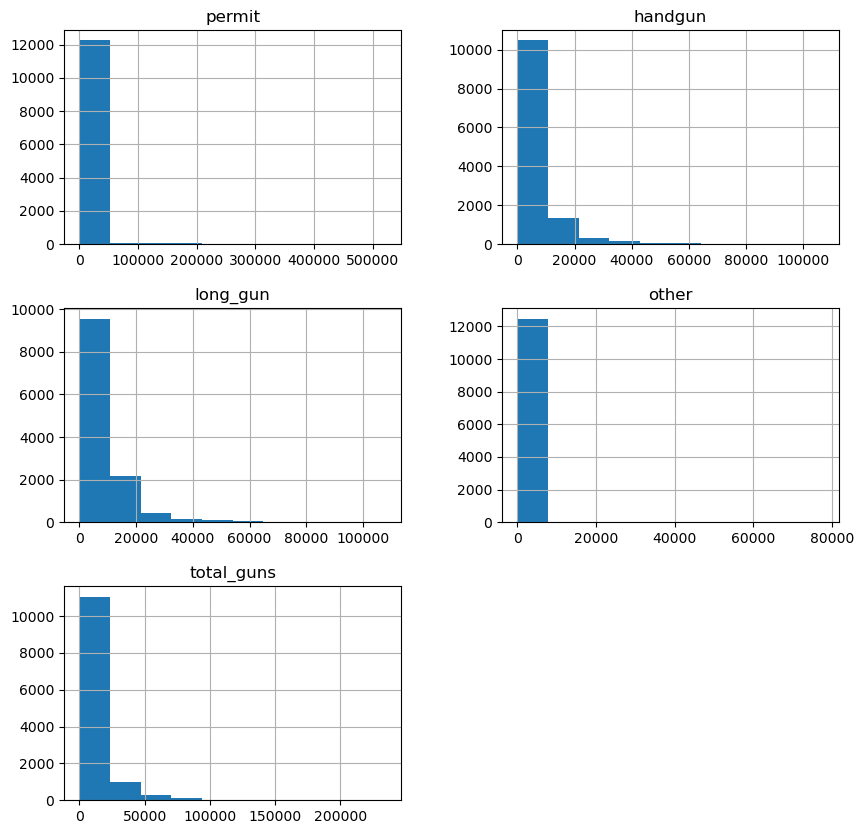

In [31]:
# Firstly let us explore the gun data frame
columns_to_explore = df_gun_selected.columns[:7]
df_gun_selected[columns_to_explore].hist(figsize=(10, 10));

<AxesSubplot:xlabel='total_guns', ylabel='state'>

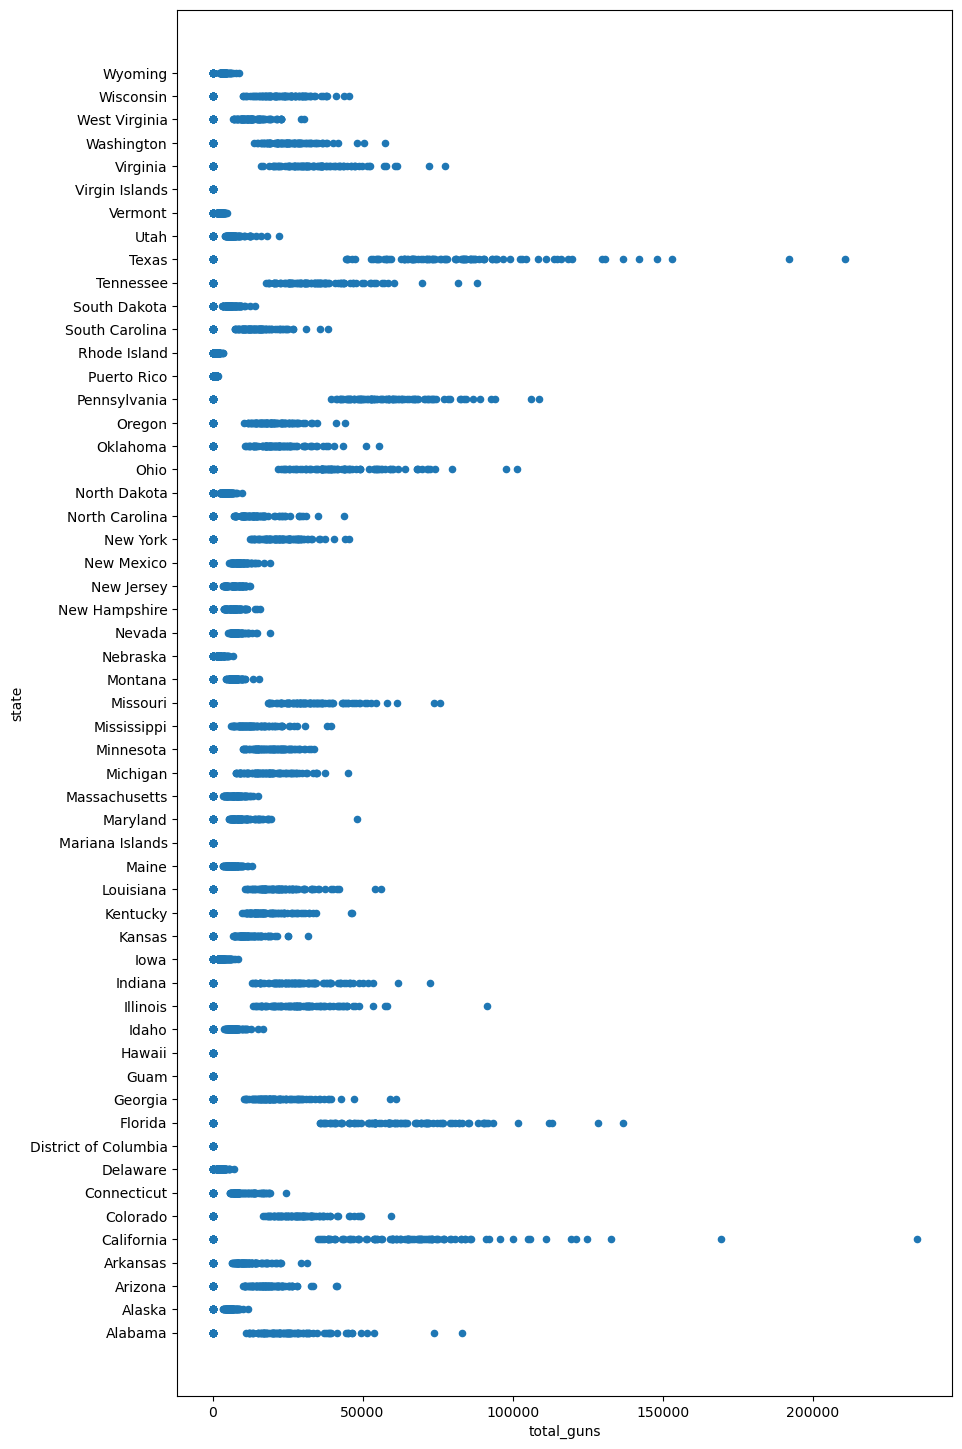

In [32]:
# Now we make a scatter compare between state and Handgun, long_gun & other
df_gun_selected.plot(x = 'total_guns', y = 'state', kind = 'scatter', figsize = (10,18))

 As we can see the most 2 states that have guns are California & Texas so we will make a comparable histogram for both states

In [33]:
# Let's make query for the two rows (Texas, California)
Texas = df_gun_selected.query('state == "Texas"')
California = df_gun_selected.query('state == "California"')

In [34]:
# Let's extract the total guns for both states
Texas_total_guns = Texas['total_guns']
California_total_guns = California['total_guns']

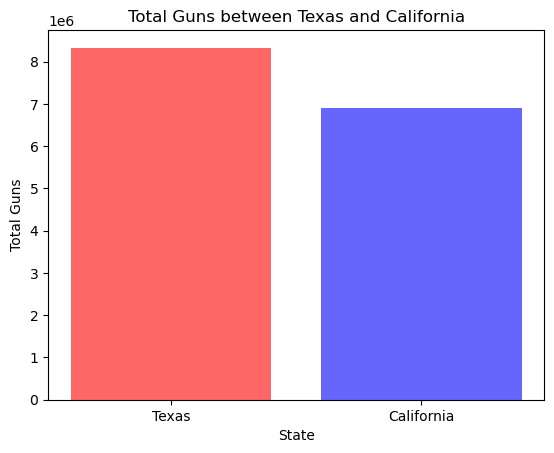

In [35]:
# Create a bar chart that compare the two states
colors = ['red', 'blue']
locations = [1,2]
labels = ['Texas', 'California']
plt.bar(labels, [Texas_total_guns.sum(), California_total_guns.sum()], color = colors, alpha = .6 )
plt.xlabel('State')
plt.ylabel('Total Guns')
plt.title('Total Guns between Texas and California')
plt.show()

### Research of What is the Overall Permited for Sates 

Text(0, 0.5, 'States during specific time')

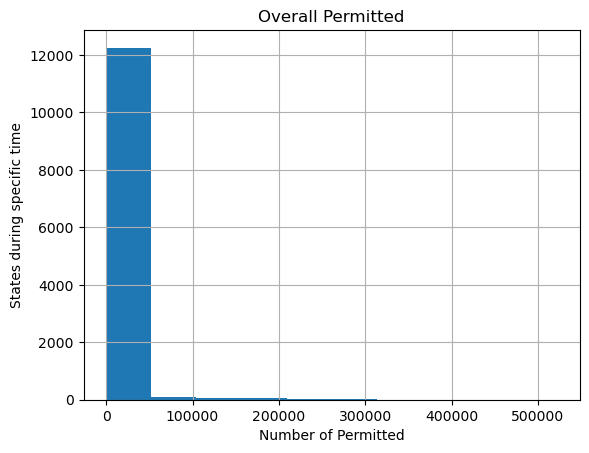

In [36]:
# For now let's explore the overall permited for states
df_gun_selected['permit'].hist();
plt.title('Overall Permitted');
plt.xlabel('Number of Permitted')
plt.ylabel('States during specific time')

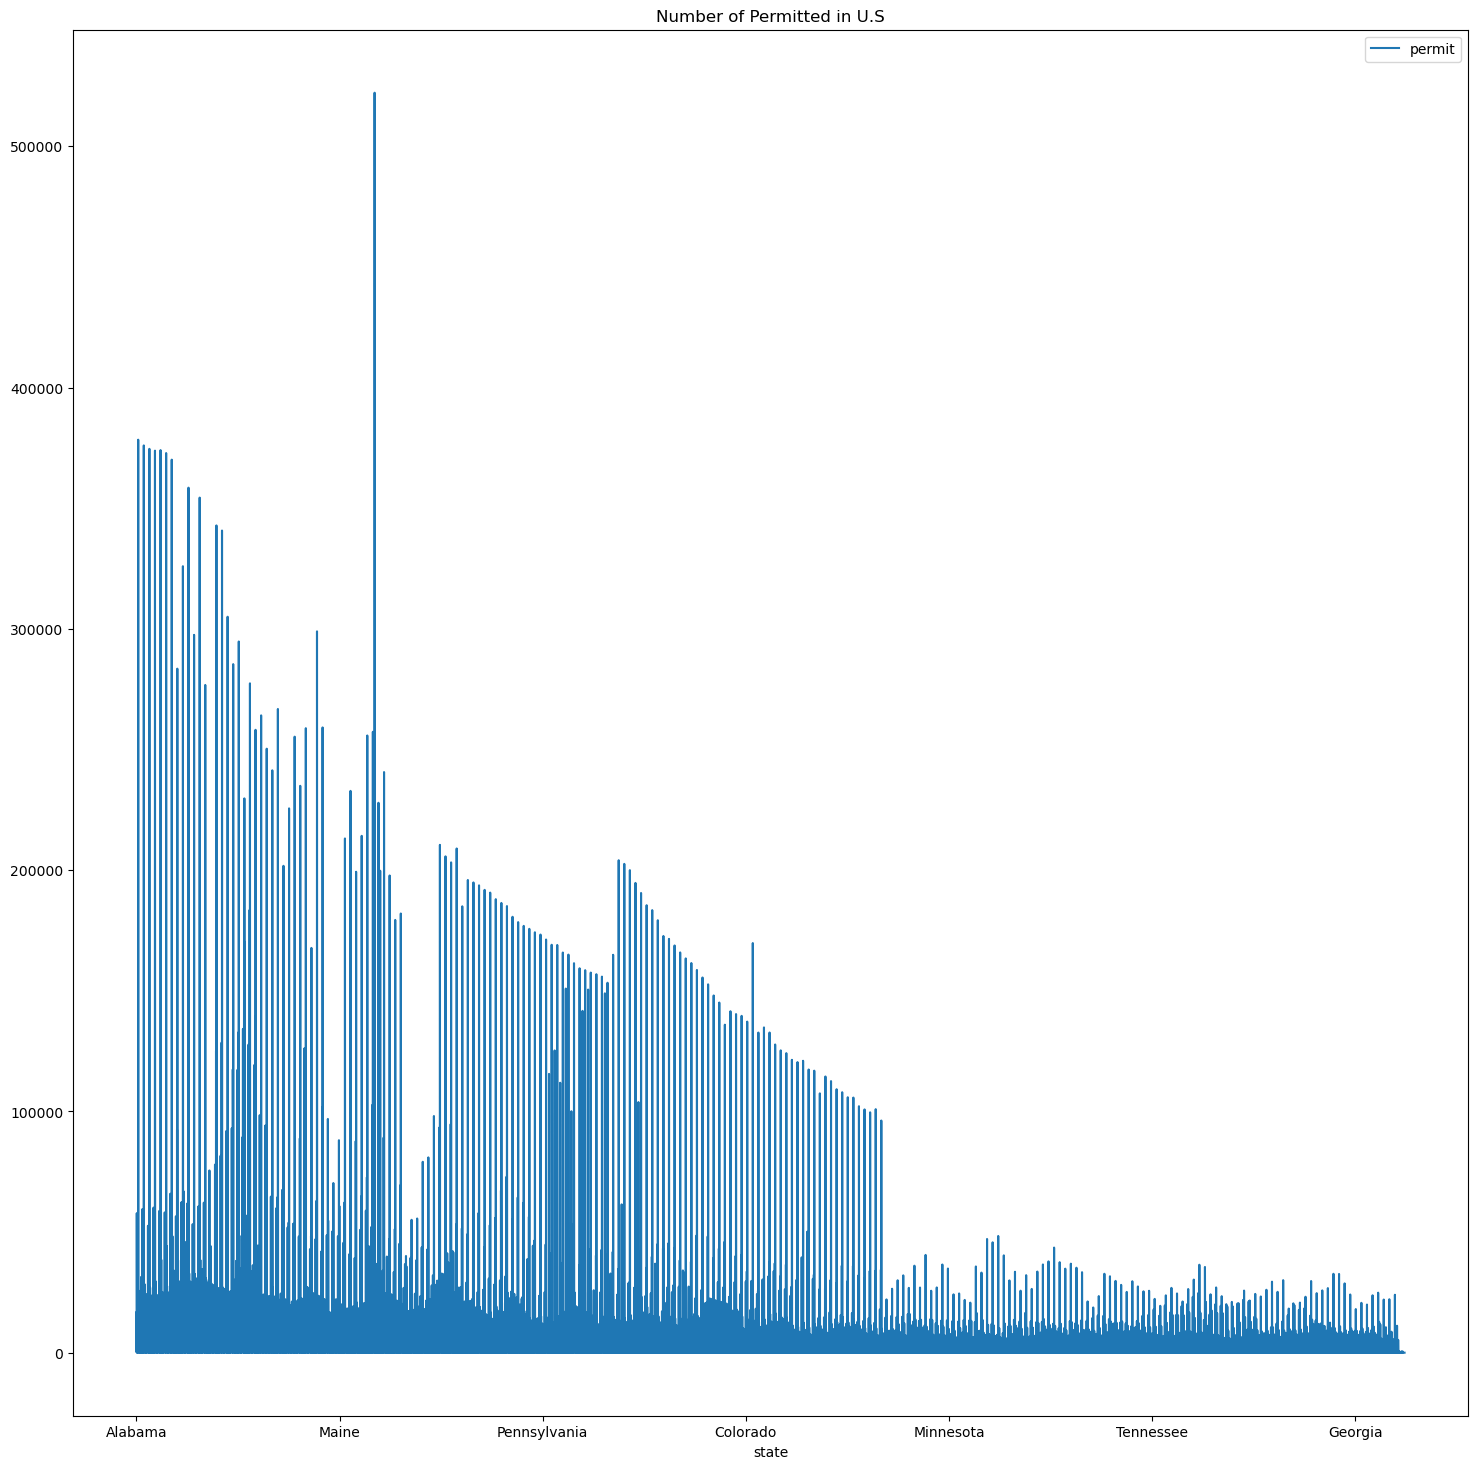

In [37]:
# Now compare each state permited using scatter
df_gun_selected.plot( x = 'state', y = 'permit', kind = 'line' , figsize = (18,18));
plt.title('Number of Permitted in U.S');


### Research of Which is the most state is linked to a high number of guns per person?

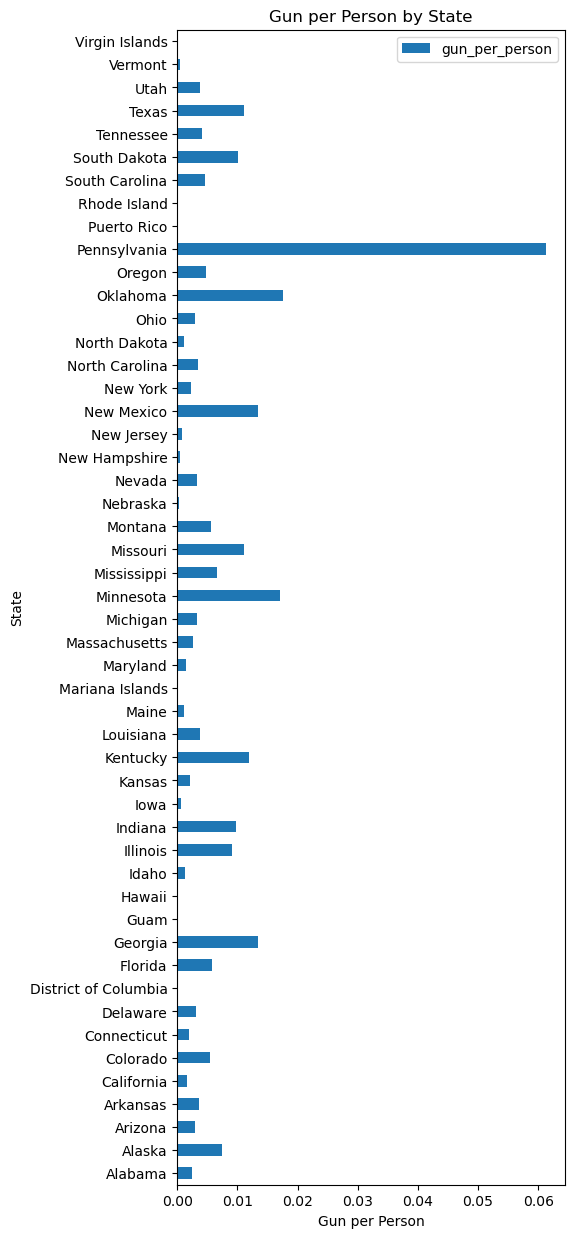

In [38]:
#  we compare each state with the gun_per_person using scatter
df_combined.plot(x='state', y='gun_per_person', kind='barh', figsize=(5, 15))
plt.xlabel('Gun per Person')
plt.ylabel('State')
plt.title('Gun per Person by State')

plt.show()

<a id='conclusions'></a>
## Conclusions

> Finally, we are going to summarize our finding & answer some questions about the result that we have been performed

One limitation of the analysis conducted to identify the state with the highest number of firearms is that it relied solely on the available dataset. The dataset used for this analysis might not encompass the entire population of firearms in the United States, as it could be limited to a specific timeframe, region, or source of data. It is important to acknowledge that there could be unaccounted or unreported firearms in states that were not included in the dataset.

Additionally, the dataset might not capture illegal firearms or those owned by individuals who did not participate in the data collection process. This limitation could affect the accuracy and completeness of the results, potentially leading to an underestimation or overestimation of the actual number of firearms in a particular state. To mitigate this limitation, future analyses could consider incorporating multiple datasets from various sources and conducting additional research to ensure a more comprehensive representation of firearm ownership across states.

In conclusion, while the analysis provides insights into the distribution of firearms in different states, the limitation of relying on a single dataset should be considered, as it may not capture the full extent of firearm ownership in the United States.

After completing the initial phase of data wrangling, where we loaded the dataset and thoroughly examined its cleanliness, we proceeded to clean and manipulate the data. This involved applying various operations such as filtering, dropping unnecessary columns, renaming columns for better clarity, adding new columns, and combining data within our data frame.

Following the data wrangling process, our next step was to explore and visualize the dataset in order to address three key questions of interest:

   >Which state possesses the highest number of handguns, long guns, and other firearm types?

   >What is the overall extent of firearm ownership permitted across different states?

   >Which state exhibits a notable concentration of firearms per person?

By delving into these questions, we aim to gain insights and provide answers based on the available dataset.

   ### Q1: Which state has the highest number of handguns, long guns, and other types of firearms?

>We computed a new column called "total_guns" by summing up the values from the "handgun," "long gun," and "other" columns. This total represents the combined number of firearms in each state. Before visualizing the data, we thoroughly explored all the columns to gain a comprehensive understanding of the dataset.

>Upon comparing the highest states in terms of total guns, we observed that Texas and California had remarkably similar numbers of firearms. To visually analyze and compare these two states, we plotted their respective data on a chart. The visualization revealed that Texas had the highest number of total guns among the states we examined.

>By conducting this analysis, we were able to identify Texas as the state with the largest overall quantity of firearms. This information sheds light on the distribution and prevalence of firearms in different regions and provides valuable insights into the landscape of gun ownership in the United States.

### What is the overall level of firearm ownership permitted across different states?

>After thoroughly exploring the data on firearm ownership across different states in the United States, we analyzed the number of permits granted in each state. Our analysis revealed that Kentucky stands out with the highest number of permits issued, surpassing other states by a significant margin. The difference between Kentucky's number of permitted individuals and those of other states is considerable. This finding sheds light on the distinctive landscape of firearm ownership permissions throughout the country.

### Which state exhibits a high number of guns per person?

>We began our analysis by cleaning the gun data and U.S. Census data frames. Once the data frames were cleaned, we merged them to create a new column that calculates the total guns per person for each state. This additional column allowed us to examine the relationship between firearm ownership and population size.

>During our exploration, we focused on the metric of guns per person to understand the relative distribution of firearms across different states. By comparing the total gun per person values for each state, we identified Pennsylvania as having the highest ratio. This finding suggests that, in relation to its population, Pennsylvania has a higher concentration of firearms compared to other states.

>This analysis provides valuable insights into the prevalence and distribution of firearms on a per capita basis, allowing for a better understanding of the landscape of gun ownership in the United States.

# Resources

> https://numpy.org/

> https://stackoverflow.com/

> https://pandas.pydata.org/

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'FBI-Gun-Data.ipynb'])

1